In [39]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [40]:


class PCA:
    def __init__(self, n_component) -> None:
        self.components = None
        self.n_component = n_component
        self.mean = None
    
    def fit(self, X):
        # mean center
        self.mean = np.mean(X, axis=0)
        X -= self.mean
        
        # covariance
        cov = np.cov(X.T)
        
        # eigen vectors and eigen values
        eve, eva = np.linalg.eig(cov)
        eve = eve.T
        indices = np.argsort(eva)[::-1]
        eva = eva[indices]
        eve = eve[indices]
        
        self.components = eve[:self.n_component]
    
    def transform(self, X):
        # project the data
        X -= self.mean
        return np.dot(X, self.components.T)
    
        

In [41]:
iris = load_iris()
X = iris.data
y = iris.target


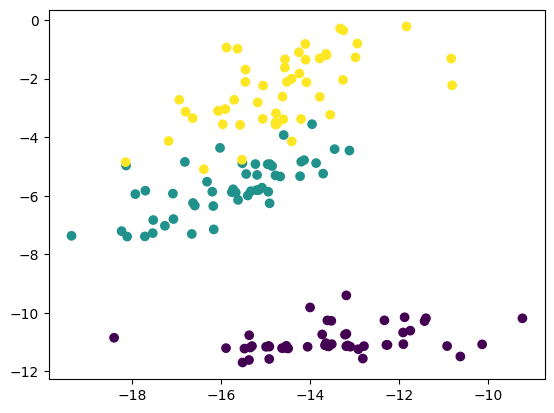

In [42]:
pca = PCA(2)
pca.fit(X)
x_trans = pca.transform(X).T
plt.scatter(x_trans[0], x_trans[1], c=y)